## Roudranil Das

#### Roll: MDS202227

#### Email: [roudranil@cmi.ac.in](mailto:roudranil@cmi.ac.in)


# Setup


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
! ln -s /content/drive/MyDrive/nlp-assignments/assignment-3/ assignment-3

Mounted at /content/drive


# Imports


In [ ]:
import numpy as np
import numpy.matlib as mat
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

from scipy import sparse, linalg

In [ ]:
import gc
from tqdm.auto import tqdm
import glob
from tabulate import tabulate

from typing import List, Dict
import sys
import pickle

In [ ]:
import nltk
from nltk import pad_sequence, ngrams
from nltk.tag.perceptron import PerceptronTagger

nltk.download("punkt")
nltk.download("book")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/d

True

In [ ]:
plt.rcParams.update(
    {"figure.figsize": (8, 5), "text.usetex": False, "font.family": "serif"}
)

# Building COALS


In [ ]:
def build_co_occurance_matrix(
    inital_comat: np.ndarray, text: List[str], word_indices: Dict[str, int]
) -> np.ndarray:
    """
    Build a co-occurrence matrix based on the input text and word indices.

    Parameters:
    - initial_comat (np.ndarray): The initial co-occurrence matrix to be updated.
    - text (List[str]): A list of strings representing the input text.
    - word_indices (Dict[str, int]): A dictionary mapping words to their indices.

    Returns:
    - np.ndarray: The updated co-occurrence matrix.
    """
    loop = tqdm(text, position=1, leave=False)
    for line in loop:
        line_words = line.split()

        for i, w in enumerate(line_words[:-1]):
            center_word = w
            try:
                center_word_index = word_indices[center_word]

                for j in range(1, 5):
                    try:
                        context_word = line_words[i + j]
                        context_word_index = word_indices[context_word]

                        inital_comat[context_word_index, center_word_index] += 5 - j
                        inital_comat[center_word_index, context_word_index] += 5 - j

                    except IndexError:
                        continue  # when the there is no i+j th index in the line
                    except KeyError:
                        continue  # when the context word is not in the most common N words
            except KeyError:
                continue  # when the center word is not in the most common N words

    return inital_comat

In [ ]:
def correlation_normalise(w):
    T = np.sum(w)
    dimension = w.shape[0]
    w_a = mat.repmat(np.sum(w, axis=1), dimension, 1).transpose()
    w_b = mat.repmat(np.sum(w, axis=0), dimension, 1)
    normalised_matrix = ((T * w) - (w_a * w_b)) / np.sqrt(
        w_a * (T - w_a) * w_b * (T - w_b)
    )
    return normalised_matrix

In [ ]:
def filter_negative(w):
    w[np.where(w < 0)] = 0
    return np.sqrt(w)

Due to memory constraints and not having access to a powerful machine, I will work with only 60 files.


In [ ]:
file_list = glob.glob("assignment-3/data/*.txt")[:90]

In [ ]:
loop = tqdm(file_list, unit=" file", position=0)
vocab = Counter()
for filepath in loop:
    with open(filepath, "r") as f:
        text = f.read()
    vocab += Counter(text.split())

  0%|          | 0/90 [00:00<?, ? file/s]

In [ ]:
most_common_words = vocab.most_common(7000)
words = sorted([w for w, _ in most_common_words])
del most_common_words
gc.collect()
word_indices = {word: index for index, word in tqdm(enumerate(words), unit=" words")}
index_to_word = {i: w for w, i in word_indices.items()}
dimension = len(words)
co_occurance_matrix = np.zeros((dimension, dimension), dtype=np.float32)

0 words [00:00, ? words/s]

In [ ]:
loop = tqdm(file_list, unit="file", position=0)
for filepath in loop:
    with open(filepath, "r") as f:
        text = f.readlines()

    co_occurance_matrix = build_co_occurance_matrix(
        co_occurance_matrix, text, word_indices
    )

  0%|          | 0/90 [00:00<?, ?file/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

  0%|          | 0/43000 [00:00<?, ?it/s]

In [ ]:
def size_of_var(var):
    size_in_bytes = sys.getsizeof(var)
    size_in_megabytes = size_in_bytes / (1024 * 1024)

    print(f"Size in bytes: {size_in_bytes} bytes")
    print(f"Size in megabytes: {size_in_megabytes:.4f} MB")

In [ ]:
size_of_var(co_occurance_matrix)

Size in bytes: 196000128 bytes
Size in megabytes: 186.9203 MB


In [ ]:
normalised_matrix = correlation_normalise(co_occurance_matrix)
filtered_matrix = filter_negative(normalised_matrix)

we can do svd as well to reduce the size of the word vectors


In [ ]:
# u, s, v = np.linalg.svd(filtered_matrix, full_matrices=True, compute_uv=True)
# print(u.shape, s.shape, v.shape)
# k = 2000
# svd_matrix = np.matmul(
#     np.matmul(filtered_matrix, v[:k, :].transpose()), np.linalg.inv(np.diag(s[:k]))
# )
# print(svd_matrix.shape)

(4000, 4000) (4000,) (4000, 4000)
(4000, 200)


In [ ]:
def save_coals_data(words, vectors):
    with open("assignment-3/words.bin", "wb") as f:
        f.write(pickle.dumps(words))
    with open("assignment-3/coals_vectors.bin", "wb") as f:
        f.write(pickle.dumps(vectors))

In [ ]:
def load_coals_data(words_path, vectors_path):
    with open(words_path, "rb") as f:
        words = pickle.load(f)

    with open(vectors_path, "rb") as f:
        vectors = pickle.load(f)

    return words, vectors

In [ ]:
save_coals_data(words, filtered_matrix)

# a. Identify 5 nouns and get 5 similar words for each noun


In [ ]:
pos_tagger = nltk.data.load("taggers/maxent_treebank_pos_tagger/english.pickle")
tagger = PerceptronTagger()
tagset = None

In [ ]:
def pos_tag_sentence(sentence):
    words = sentence.split()
    tagset = None
    pos_tags = nltk.tag._pos_tag(words, tagset, tagger, lang="eng")
    return pos_tags


noun_expressions = ["NN", "NNS", "NNP", "NNPS"]
nouns = []
loop = tqdm(file_list, position=0)
for filename in loop:
    with open(filename, "r") as f:
        text = f.readlines()
    inner_loop = tqdm(text, position=1, leave=False)
    for line in inner_loop:
        pos_tags = pos_tag_sentence(line)
        for word, tag in pos_tags:
            if tag in noun_expressions:
                nouns.append(word)

In [ ]:
nouns_to_test = ["aircraft", "president", "computer", "army", "students"]
nouns_to_test.sort()

In [ ]:
words, vectors = load_coals_data(
    "assignment-3/words.bin", "assignment-3/coals_vectors.bin"
)
word_indices = {word: index for index, word in tqdm(enumerate(words), unit=" words")}
index_to_word = {i: w for w, i in word_indices.items()}

0 words [00:00, ? words/s]

In [ ]:
test_noun_indices = [word_indices[n] for n in nouns_to_test]
test_noun_vectors = vectors[test_noun_indices, :]
similarities = cosine_similarity(test_noun_vectors, vectors)

Lets take some of the 5 most similar words


In [ ]:
top5_similar_word_indices = np.argsort(similarities, axis=-1)[:, -18:-1:3]
top5_similar_word_indices

array([[6710, 2431,  936, 2493, 5767, 6694],
       [5249,  788, 1258, 4229, 4035, 1479],
       [3272, 1792, 1631,  332, 1330, 1329],
       [4916,  337, 5682, 5646, 4917, 6717],
       [2789,  463, 1089, 6610, 2787, 6282]])

In [ ]:
similar_words = {}
for i, word in enumerate(nouns_to_test):
    similar_words[word] = [
        index_to_word[idx] for idx in top5_similar_word_indices[i][::-1]
    ]

In [ ]:
for n in similar_words.keys():
    print(f"===> Noun = {n}")
    print(f"===> Similar words: ")
    for w in similar_words[n]:
        print(f"\t> {w}")
    print("=" * 30 + "\n")

===> Noun = aircraft
===> Similar words: 
	> vehicles
	> ships
	> flight
	> cargo
	> fighter
	> vessels

===> Noun = army
===> Similar words: 
	> corps
	> military
	> naval
	> commanded
	> brigade
	> regiment

===> Noun = computer
===> Similar words: 
	> computers
	> computing
	> application
	> data
	> device
	> interface

===> Noun = president
===> Similar words: 
	> vicepresident
	> presidents
	> secretary
	> senator
	> appointed
	> presidential

===> Noun = students
===> Similar words: 
	> teachers
	> grades
	> undergraduate
	> children
	> attend
	> graduate



# b. Choose word from step a that has good set of similar words


Let us choose computer


# c. Get the most similar words to `computer`


In [ ]:
chosen_word_vector = vectors[word_indices["computer"], :].reshape(1, -1)
similarities = cosine_similarity(chosen_word_vector, vectors)
similar_words_to_chosen_indices = np.argsort(similarities, axis=1)[0][-6:]
similar_words_to_chosen = [
    index_to_word[idx] for idx in similar_words_to_chosen_indices[::-1]
]

print(f"===> Similar words to computer:")
print("\n".join([f"\t> {w}" for w in similar_words_to_chosen]))

===> Similar words to computer:
	> computer
	> software
	> computers
	> systems
	> hardware
	> computing


# d. Take first 200 elements of word vectors of the words shown above


In [ ]:
chosen_vectors = vectors[similar_words_to_chosen_indices, :200]

# e. Normalise values to be between 0 and 255


In [ ]:
normalised_vectors = 255 * (
    (chosen_vectors - chosen_vectors.min())
    / (chosen_vectors.max() - chosen_vectors.min())
)
normalised_vectors = np.round(normalised_vectors)

# f. Visualise word vectors


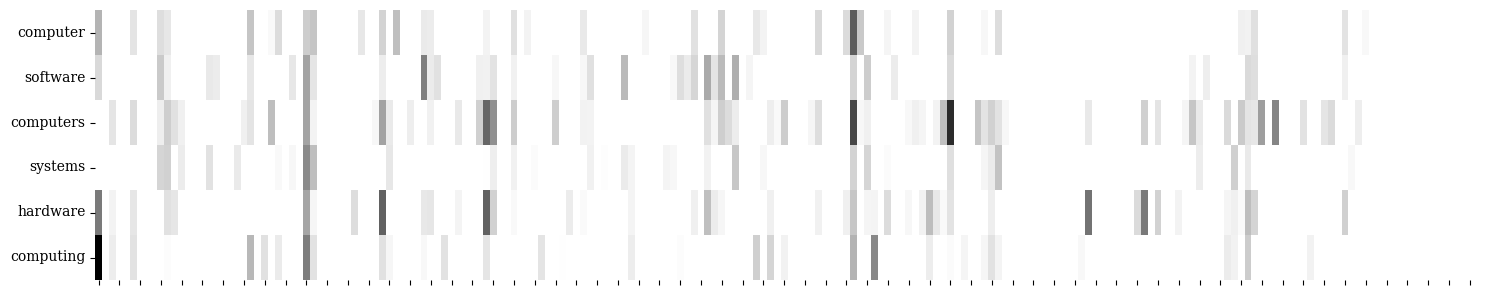

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax = sns.heatmap(normalised_vectors, cmap="Greys", cbar=False, ax=ax)
ax.set_yticklabels(
    [f"{similar_words_to_chosen[i]}" for i in range(normalised_vectors.shape[0])],
    rotation=0,
)
ax.set_xticklabels([])
plt.tight_layout()
plt.show()